<a href="https://colab.research.google.com/github/AjayKumarAryan/Aryanpygit/blob/main/Handwritten_digits_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[1].shape

(28, 28)

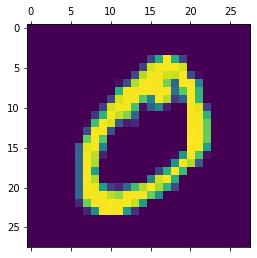

In [6]:
plt.matshow(X_train[1])

In [7]:
y_train[1]

0

In [8]:
X_train = X_train / 255
X_test = X_test / 255

**Using ANN for classification**

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2483 - accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1067 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0451 - accuracy: 0.9854


In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9739


[0.08526074886322021, 0.9739000201225281]

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

**Using CNN for classification**

In [13]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(400, activation='relu'),
    layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 3ms/step - loss: 0.1720 - accuracy: 0.9480
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0366 - accuracy: 0.9901
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0266 - accuracy: 0.9927


In [17]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9829


[0.09288188815116882, 0.9829000234603882]